# MLP
Mean RCI over 14 cell lines.

This notebook uses
lncRNA, canonical, no middle-exclusion train, yes middle-exclusion test, -1 threshold, learning module, cross-validation.

There was a learn fail during CV.

In [1]:
SEED = 44
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 18:11:11.233912


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = True
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = True
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 18:11:13.362383
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 4372
Num RCI: 4372
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 4372 sequences.

Training # 1 1
2023-04-29 18:11:24.319438
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1810:1687 51.76%
Computed class weights: {0: 1.0364552459988146, 1: 0.9660220994475138}
Valid 1:0 259:273 48.68%
FIT


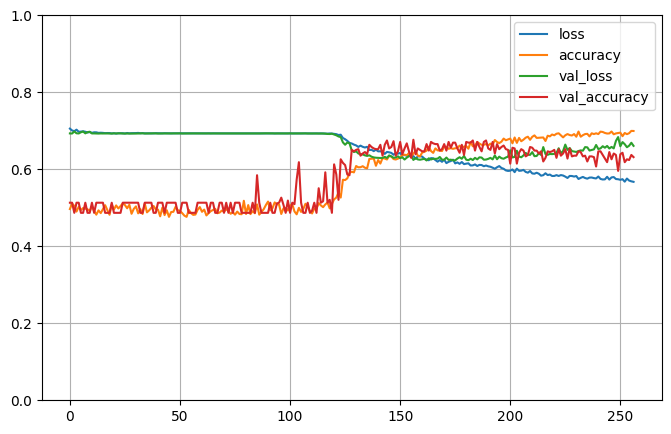


Testing # 1 1
2023-04-29 18:14:47.998247
PREDICT
Test 1:0 259:273 48.68%
Predict 1:0 273:259 51.32%
Test sizes (532, 1025) (532,)
Distrib of scores: 0.49724522 mean 0.16099562 std
Range of scores: 0.08916801 to 0.83671
Score threshold 0.5
Confusion matrix
 [[180  93]
 [ 79 180]]
Normalized matrix
 [[0.33834586 0.17481203]
 [0.14849624 0.33834586]]
Extreme scores correct, pos:neg 73 87
Extreme scores incorrect pos:neg 32 23


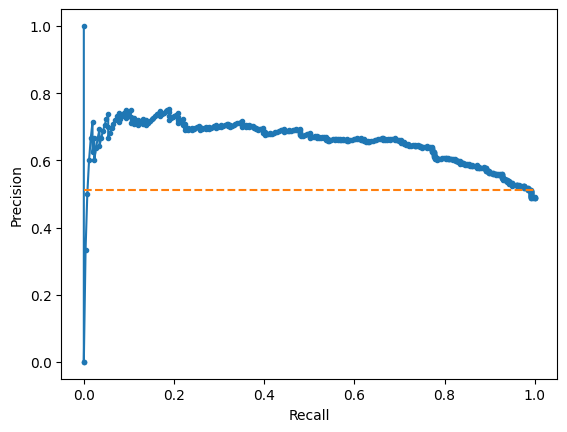

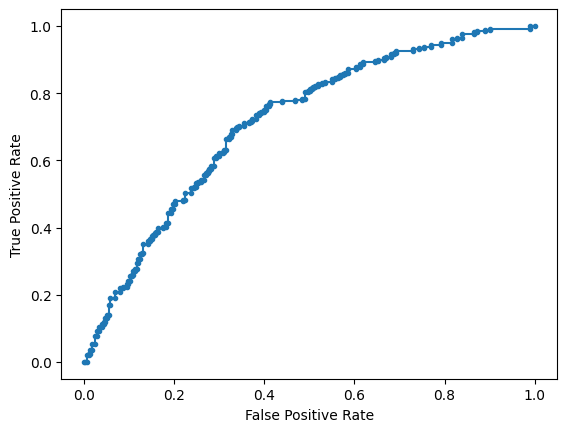

Accuracy: 67.67% Precision: 65.93% Recall: 69.50%
F1: 67.67% MCC: 0.3543
AUPRC: 65.56% AUROC: 71.36%
 accuracy [67.66917293233082]
 precision [65.93406593406593]
 recall [69.4980694980695]
 F1 [67.66917293233082]
 MCC [0.3543213543213543]
 AUPRC [65.55828618262237]
 AUROC [71.35502849788566]

Training # 1 2
2023-04-29 18:14:48.952395
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1789:1708 51.16%
Computed class weights: {0: 1.023711943793911, 1: 0.9773616545556176}
Valid 1:0 273:270 50.28%
FIT


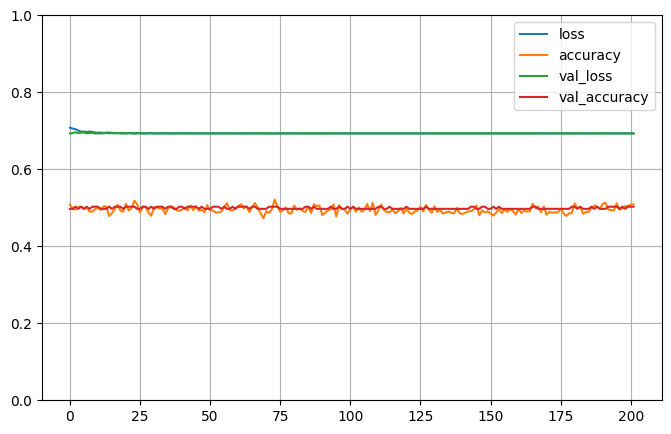


Testing # 1 2
2023-04-29 18:17:12.677187
PREDICT
Test 1:0 273:270 50.28%
Predict 1:0 543:0 100.00%
Test sizes (543, 1025) (543,)
Distrib of scores: 0.50001913 mean 2.512656e-06 std
Range of scores: 0.5000127 to 0.5000289
Score threshold 0.5
Confusion matrix
 [[  0 270]
 [  0 273]]
Normalized matrix
 [[0.         0.49723757]
 [0.         0.50276243]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


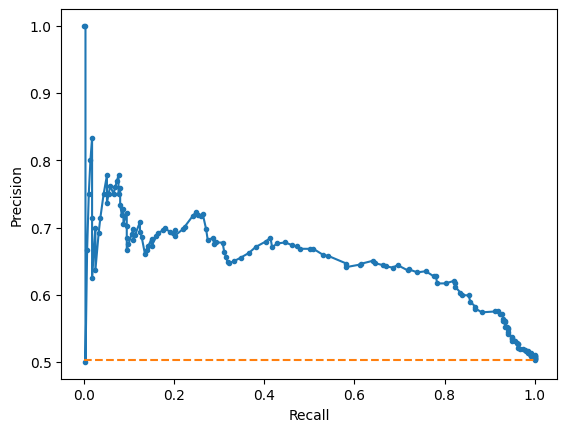

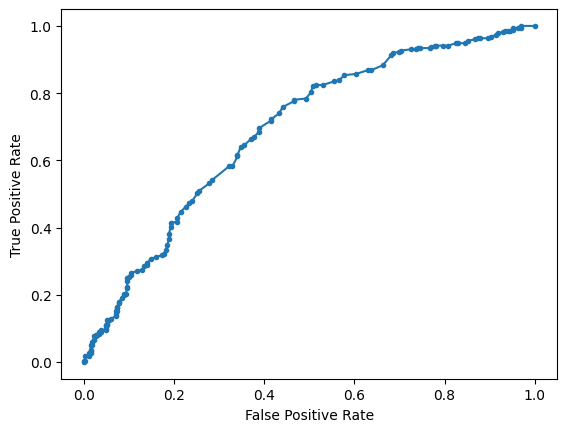

Accuracy: 50.28% Precision: 50.28% Recall: 100.00%
F1: 66.91% MCC: 0.0000
AUPRC: 65.26% AUROC: 68.98%
 accuracy [50.27624309392266]
 precision [50.27624309392266]
 recall [100.0]
 F1 [66.91176470588235]
 MCC [0.0]
 AUPRC [65.26353980119606]
 AUROC [68.98114231447565]

Training # 1 3
2023-04-29 18:17:13.544668
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1810:1688 51.74%
Computed class weights: {0: 1.036137440758294, 1: 0.9662983425414364}
Valid 1:0 251:256 49.51%
FIT


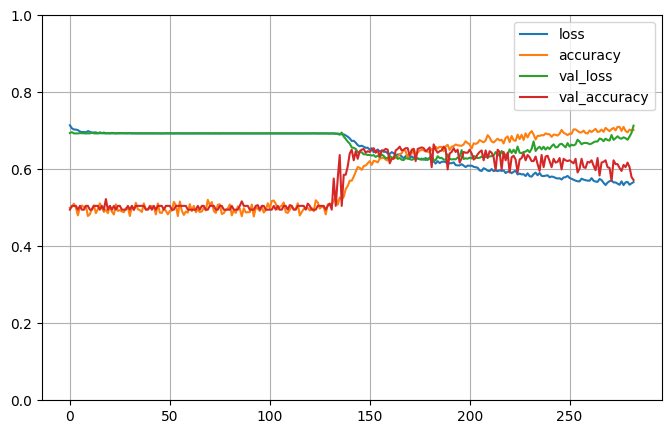


Testing # 1 3
2023-04-29 18:20:37.086904
PREDICT
Test 1:0 251:256 49.51%
Predict 1:0 279:228 55.03%
Test sizes (507, 1025) (507,)
Distrib of scores: 0.5097118 mean 0.1664692 std
Range of scores: 0.042276934 to 0.8530925
Score threshold 0.5
Confusion matrix
 [[157  99]
 [ 71 180]]
Normalized matrix
 [[0.30966469 0.19526627]
 [0.14003945 0.35502959]]
Extreme scores correct, pos:neg 73 75
Extreme scores incorrect pos:neg 36 18


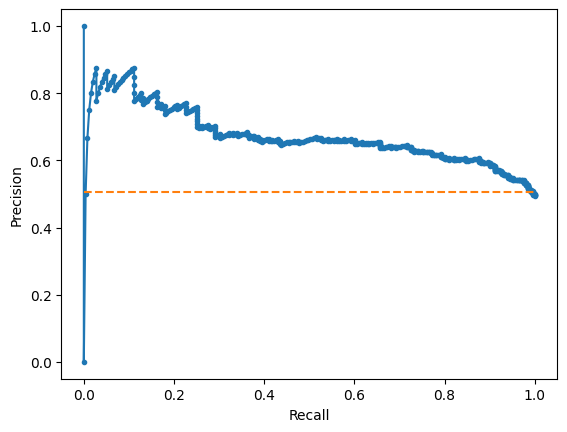

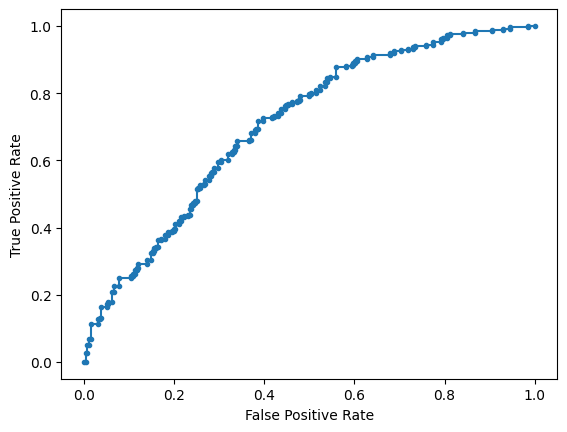

Accuracy: 66.47% Precision: 64.52% Recall: 71.71%
F1: 67.92% MCC: 0.3321
AUPRC: 67.15% AUROC: 70.59%
 accuracy [66.46942800788955]
 precision [64.51612903225806]
 recall [71.71314741035857]
 F1 [67.9245283018868]
 MCC [0.3320810410019217]
 AUPRC [67.15428743787078]
 AUROC [70.59418575697211]

Training # 1 4
2023-04-29 18:20:37.997980
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1778:1720 50.83%
Computed class weights: {0: 1.0168604651162791, 1: 0.9836895388076491}
Valid 1:0 257:245 51.20%
FIT


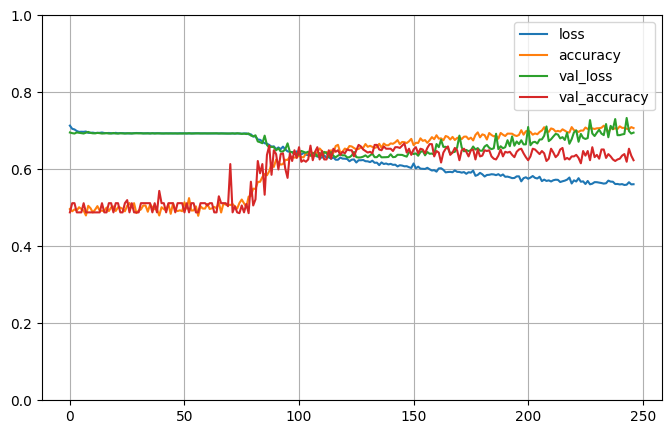


Testing # 1 4
2023-04-29 18:24:02.022159
PREDICT
Test 1:0 257:245 51.20%
Predict 1:0 246:256 49.00%
Test sizes (502, 1025) (502,)
Distrib of scores: 0.48500508 mean 0.19004259 std
Range of scores: 0.03373941 to 0.86472815
Score threshold 0.5
Confusion matrix
 [[167  78]
 [ 89 168]]
Normalized matrix
 [[0.33266932 0.15537849]
 [0.17729084 0.33466135]]
Extreme scores correct, pos:neg 82 86
Extreme scores incorrect pos:neg 27 34


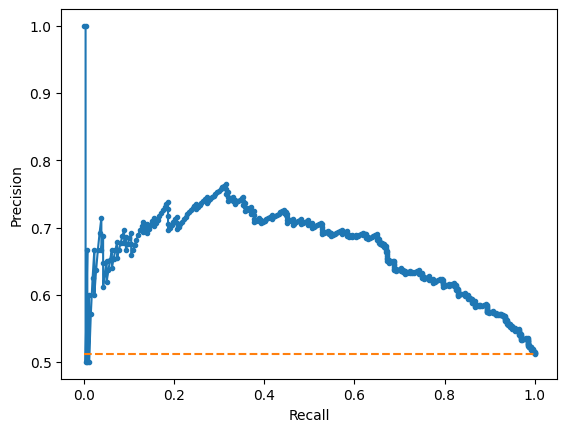

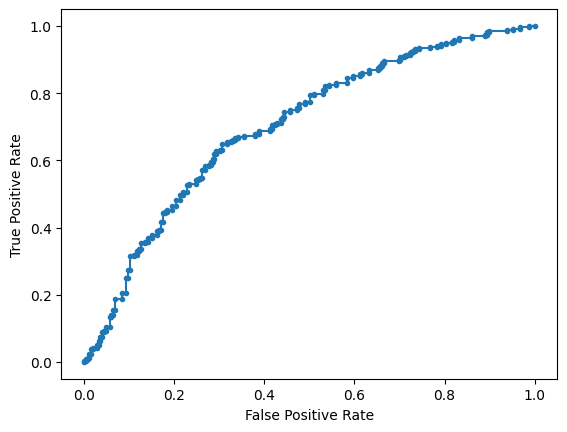

Accuracy: 66.73% Precision: 68.29% Recall: 65.37%
F1: 66.80% MCC: 0.3353
AUPRC: 66.83% AUROC: 70.12%
 accuracy [66.73306772908366]
 precision [68.29268292682927]
 recall [65.36964980544747]
 F1 [66.79920477137176]
 MCC [0.3352998639130433]
 AUPRC [66.82617157591761]
 AUROC [70.12149606924483]

Training # 1 5
2023-04-29 18:24:02.810516
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1785:1713 51.03%
Computed class weights: {0: 1.021015761821366, 1: 0.9798319327731092}
Valid 1:0 281:242 53.73%
FIT


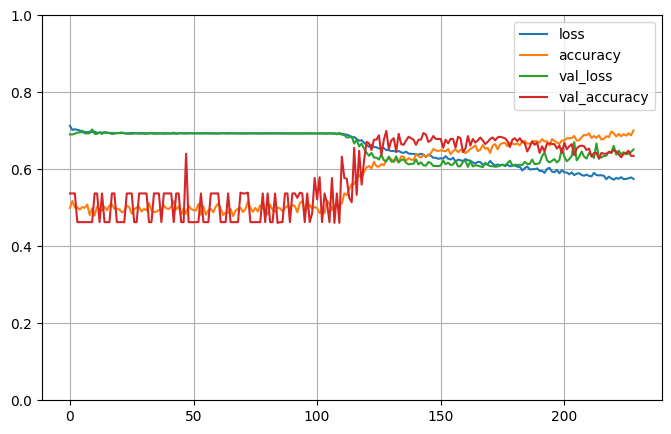


Testing # 1 5
2023-04-29 18:26:18.148148
PREDICT
Test 1:0 281:242 53.73%
Predict 1:0 308:215 58.89%
Test sizes (523, 1025) (523,)
Distrib of scores: 0.5343741 mean 0.12741879 std
Range of scores: 0.21090302 to 0.84580624
Score threshold 0.5
Confusion matrix
 [[150  92]
 [ 65 216]]
Normalized matrix
 [[0.28680688 0.17590822]
 [0.12428298 0.41300191]]
Extreme scores correct, pos:neg 75 36
Extreme scores incorrect pos:neg 29 3


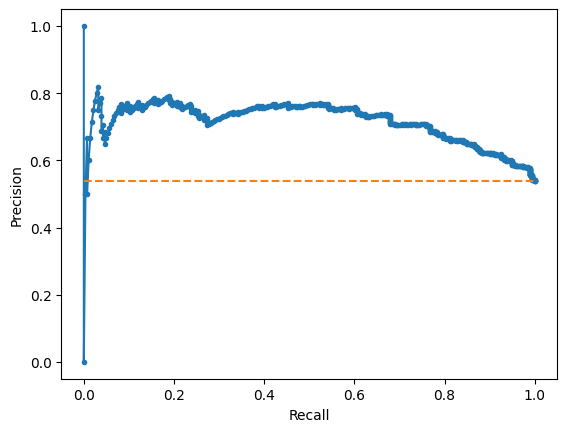

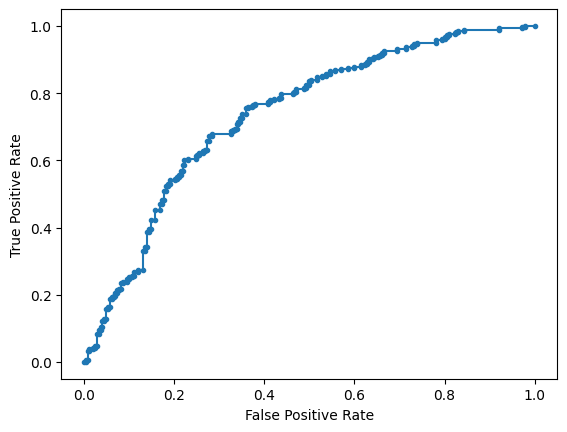

Accuracy: 69.98% Precision: 70.13% Recall: 76.87%
F1: 73.34% MCC: 0.3937
AUPRC: 71.47% AUROC: 73.57%
 accuracy [69.98087954110899]
 precision [70.12987012987013]
 recall [76.86832740213522]
 F1 [73.3446519524618]
 MCC [0.3937108488730234]
 AUPRC [71.47194616298364]
 AUROC [73.57430663804006]

Training # 2 1
2023-04-29 18:26:18.725476
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1807:1690 51.67%
Computed class weights: {0: 1.0346153846153847, 1: 0.9676258992805755}
Valid 1:0 261:256 50.48%
FIT


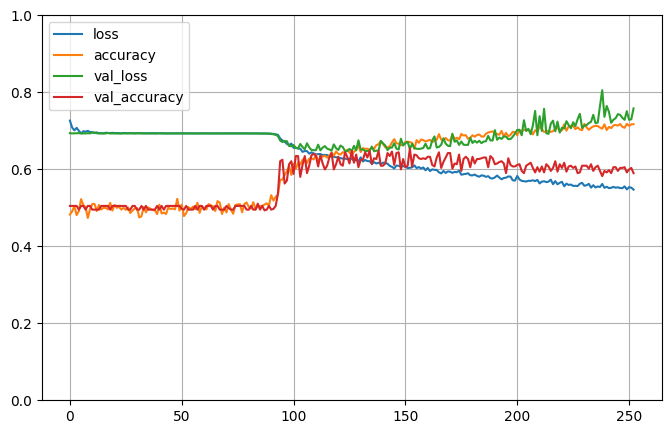


Testing # 2 1
2023-04-29 18:28:46.060605
PREDICT
Test 1:0 261:256 50.48%
Predict 1:0 278:239 53.77%
Test sizes (517, 1025) (517,)
Distrib of scores: 0.4988012 mean 0.18605626 std
Range of scores: 0.012080179 to 0.8557899
Score threshold 0.5
Confusion matrix
 [[158  98]
 [ 81 180]]
Normalized matrix
 [[0.30560928 0.18955513]
 [0.15667311 0.34816248]]
Extreme scores correct, pos:neg 81 84
Extreme scores incorrect pos:neg 37 33


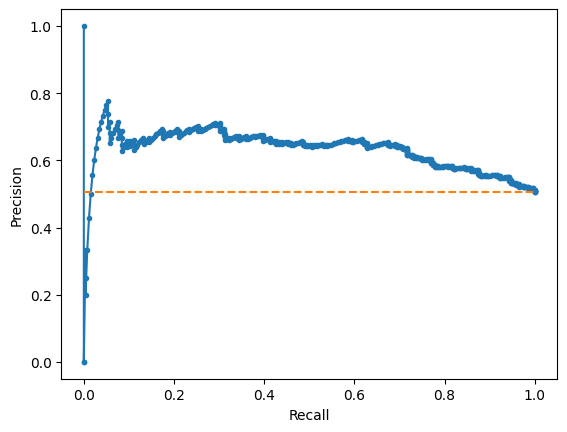

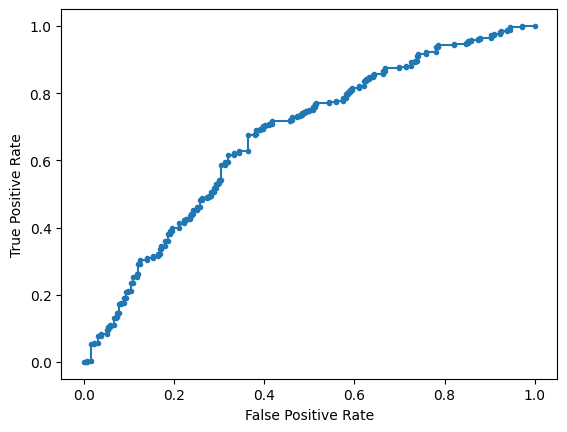

Accuracy: 65.38% Precision: 64.75% Recall: 68.97%
F1: 66.79% MCC: 0.3077
AUPRC: 63.12% AUROC: 67.10%
 accuracy [65.37717601547389]
 precision [64.74820143884892]
 recall [68.96551724137932]
 F1 [66.79035250463822]
 MCC [0.3077050645637619]
 AUPRC [63.124778237659775]
 AUROC [67.09620450191571]

Training # 2 2
2023-04-29 18:28:46.673714
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1794:1703 51.30%
Computed class weights: {0: 1.0267175572519085, 1: 0.9746376811594203}
Valid 1:0 278:258 51.87%
FIT


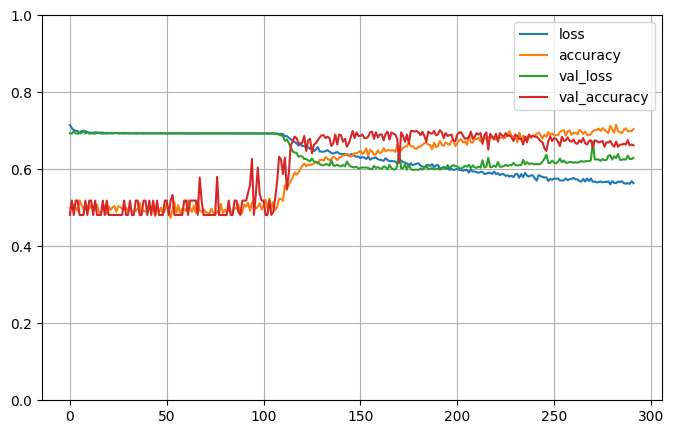


Testing # 2 2
2023-04-29 18:32:10.557852
PREDICT
Test 1:0 278:258 51.87%
Predict 1:0 300:236 55.97%
Test sizes (536, 1025) (536,)
Distrib of scores: 0.51117116 mean 0.19824049 std
Range of scores: 0.022293871 to 0.87192875
Score threshold 0.5
Confusion matrix
 [[167  91]
 [ 69 209]]
Normalized matrix
 [[0.31156716 0.16977612]
 [0.12873134 0.38992537]]
Extreme scores correct, pos:neg 111 92
Extreme scores incorrect pos:neg 37 26


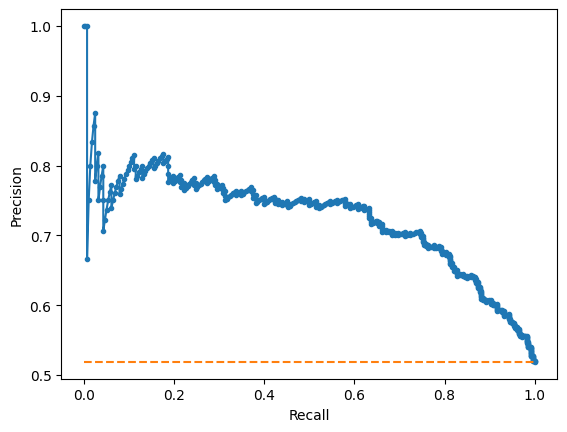

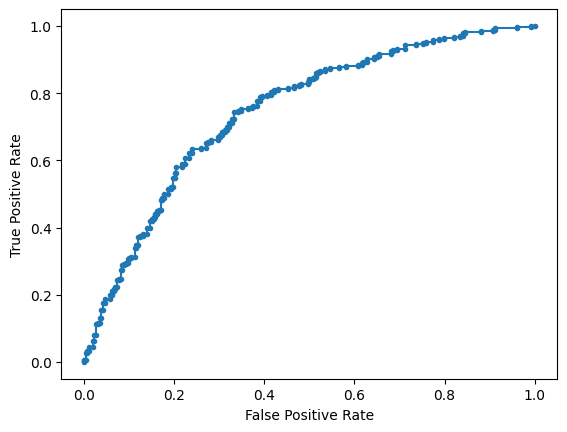

Accuracy: 70.15% Precision: 69.67% Recall: 75.18%
F1: 72.32% MCC: 0.4017
AUPRC: 72.43% AUROC: 74.57%
 accuracy [70.1492537313433]
 precision [69.66666666666667]
 recall [75.17985611510791]
 F1 [72.31833910034602]
 MCC [0.4016811423221661]
 AUPRC [72.42558662702699]
 AUROC [74.56639339691037]

Training # 2 3
2023-04-29 18:32:11.188519
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1771:1727 50.63%
Computed class weights: {0: 1.0127388535031847, 1: 0.9875776397515528}
Valid 1:0 271:245 52.52%
FIT


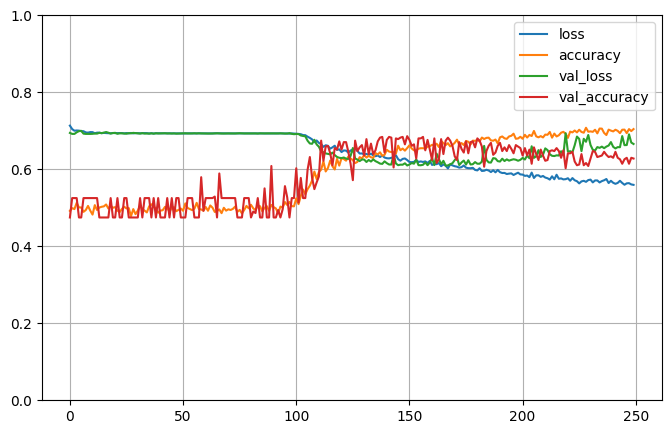


Testing # 2 3
2023-04-29 18:35:35.315763
PREDICT
Test 1:0 271:245 52.52%
Predict 1:0 311:205 60.27%
Test sizes (516, 1025) (516,)
Distrib of scores: 0.52587235 mean 0.1688664 std
Range of scores: 0.06331443 to 0.8304749
Score threshold 0.5
Confusion matrix
 [[144 101]
 [ 61 210]]
Normalized matrix
 [[0.27906977 0.19573643]
 [0.11821705 0.40697674]]
Extreme scores correct, pos:neg 95 71
Extreme scores incorrect pos:neg 38 15


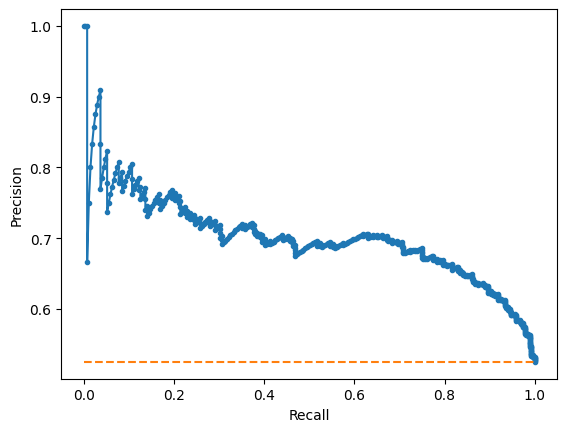

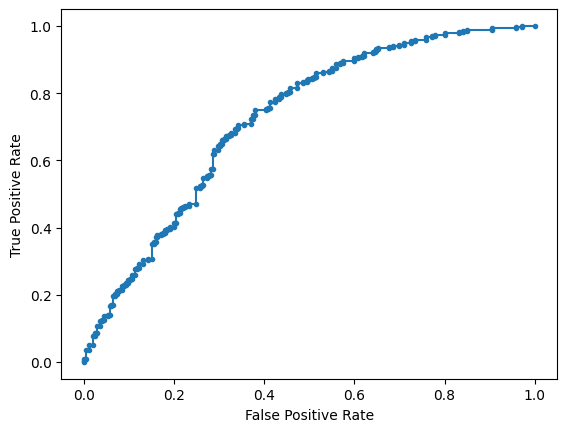

Accuracy: 68.60% Precision: 67.52% Recall: 77.49%
F1: 72.16% MCC: 0.3701
AUPRC: 70.14% AUROC: 72.25%
 accuracy [68.6046511627907]
 precision [67.52411575562701]
 recall [77.49077490774908]
 F1 [72.16494845360826]
 MCC [0.3700953547338898]
 AUPRC [70.1370029760816]
 AUROC [72.25092250922509]

Training # 2 4
2023-04-29 18:35:35.947700
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1816:1682 51.92%
Computed class weights: {0: 1.039833531510107, 1: 0.9631057268722467}
Valid 1:0 241:267 47.44%
FIT


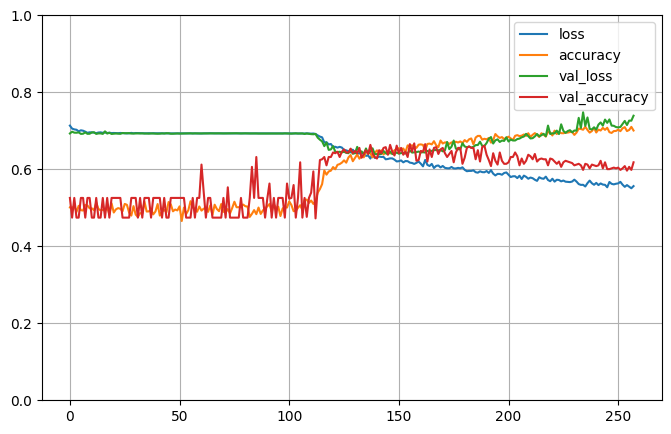


Testing # 2 4
2023-04-29 18:38:59.460310
PREDICT
Test 1:0 241:267 47.44%
Predict 1:0 270:238 53.15%
Test sizes (508, 1025) (508,)
Distrib of scores: 0.50933295 mean 0.18210836 std
Range of scores: 0.06906904 to 0.88569796
Score threshold 0.5
Confusion matrix
 [[168  99]
 [ 70 171]]
Normalized matrix
 [[0.33070866 0.19488189]
 [0.13779528 0.33661417]]
Extreme scores correct, pos:neg 83 78
Extreme scores incorrect pos:neg 47 23


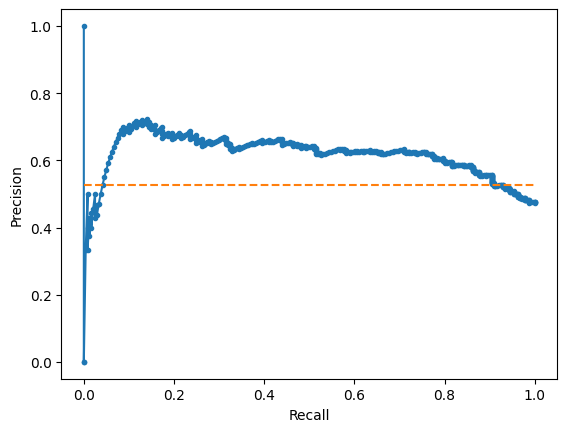

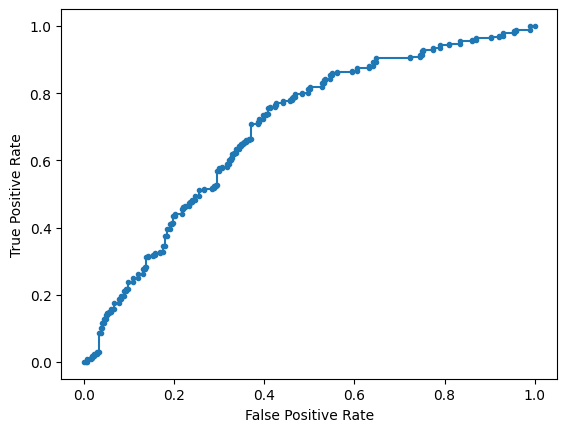

Accuracy: 66.73% Precision: 63.33% Recall: 70.95%
F1: 66.93% MCC: 0.3390
AUPRC: 61.59% AUROC: 69.32%
 accuracy [66.73228346456693]
 precision [63.33333333333333]
 recall [70.95435684647303]
 F1 [66.92759295499022]
 MCC [0.338986291378407]
 AUPRC [61.59067447689453]
 AUROC [69.31636284519868]

Training # 2 5
2023-04-29 18:39:00.038547
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1784:1714 51.00%
Computed class weights: {0: 1.0204200700116686, 1: 0.9803811659192825}
Valid 1:0 270:260 50.94%
FIT


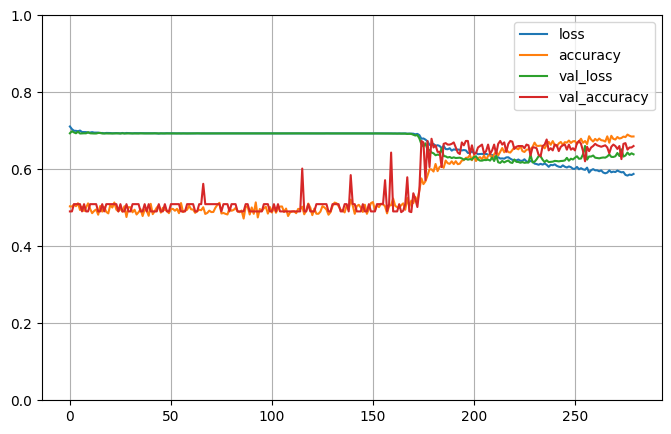


Testing # 2 5
2023-04-29 18:41:41.075076
PREDICT
Test 1:0 270:260 50.94%
Predict 1:0 296:234 55.85%
Test sizes (530, 1025) (530,)
Distrib of scores: 0.52392083 mean 0.08979412 std
Range of scores: 0.29284352 to 0.7876616
Score threshold 0.5
Confusion matrix
 [[162  98]
 [ 72 198]]
Normalized matrix
 [[0.30566038 0.18490566]
 [0.13584906 0.37358491]]
Extreme scores correct, pos:neg 40 4
Extreme scores incorrect pos:neg 12 0


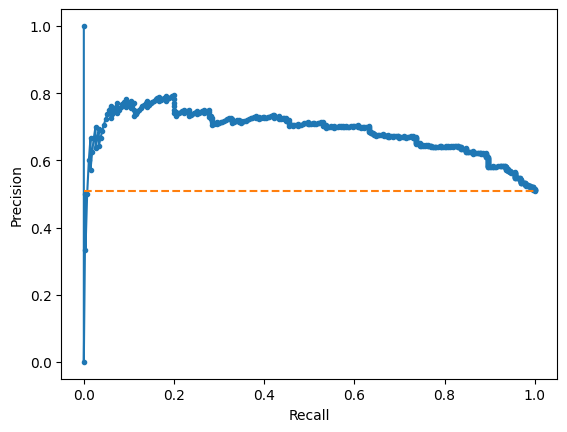

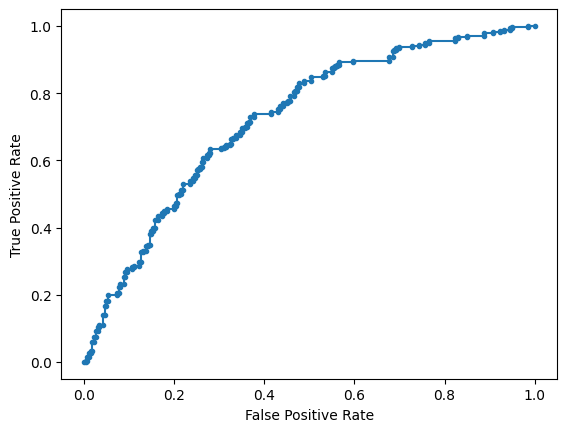

Accuracy: 67.92% Precision: 66.89% Recall: 73.33%
F1: 69.96% MCC: 0.3588
AUPRC: 68.54% AUROC: 72.31%
 accuracy [67.9245283018868]
 precision [66.8918918918919]
 recall [73.33333333333333]
 F1 [69.96466431095406]
 MCC [0.3588103525951899]
 AUPRC [68.53610720176133]
 AUROC [72.3133903133903]
2023-04-29 18:41:41.717655


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 65.99% std 5.73
 precision mean 65.13% std 5.67
 recall mean 74.94% std 9.57
 F1 mean 69.08% std 2.63
 MCC mean 0.3193 std 0.1158
 AUPRC mean 67.21% std 3.51
 AUROC mean 71.02% std 2.26
 accuracy [[67.66917293233082], [50.27624309392266], [66.46942800788955], [66.73306772908366], [69.98087954110899], [65.37717601547389], [70.1492537313433], [68.6046511627907], [66.73228346456693], [67.9245283018868]]
 precision [[65.93406593406593], [50.27624309392266], [64.51612903225806], [68.29268292682927], [70.12987012987013], [64.74820143884892], [69.66666666666667], [67.52411575562701], [63.33333333333333], [66.8918918918919]]
 recall [[69.4980694980695], [100.0], [71.71314741035857], [65.36964980544747], [76.86832740213522], [68.96551724137932], [75.17985611510791], [77.49077490774908], [70.95435684647303], [73.33333333333333]]
 F1 [[67.66917293233082], [66.91176470588235], [67.9245283018868], [66.79920477137176], [73.3446519524618], [66.79035250463822], [72.31833910034602], [72.